In [1]:
# Dependencies
import pandas as pd
from bs4 import BeautifulSoup
import requests
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# URL of page to be scraped
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

In [3]:
tables = pd.read_html(url)
tables

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [4]:
type(tables)

list

In [5]:
Mars_df = tables[0]
Mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [6]:
Mars_df.min_temp = Mars_df.min_temp.astype('int64')
Mars_df.pressure = Mars_df.pressure.astype('int64')


In [7]:
Mars_df = tables[0]
Mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75,739
1,13,2012-08-17,11,156,6,-76,740
2,24,2012-08-18,12,156,6,-76,741
3,35,2012-08-19,13,157,6,-74,732
4,46,2012-08-20,14,157,6,-74,740


In [8]:
Mars_df.to_csv("Resources/Mars_data.csv", index=False)

In [13]:
Mars_df[['min_temp']].mean(axis=1)


0      -75.0
1      -76.0
2      -76.0
3      -74.0
4      -74.0
        ... 
1862   -78.0
1863   -77.0
1864   -76.0
1865   -77.0
1866   -77.0
Length: 1867, dtype: float64

In [14]:
Mars_df[['min_temp']].mean(axis=1)
Mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75,739
1,13,2012-08-17,11,156,6,-76,740
2,24,2012-08-18,12,156,6,-76,741
3,35,2012-08-19,13,157,6,-74,732
4,46,2012-08-20,14,157,6,-74,740


In [15]:
Mars_df.groupby('min_temp').mean()

,id,sol,ls,month,pressure
min_temp,,,,,
-90,1119.000000,1188.000000,79.000000,3.000000,881.000000
-89,1134.000000,1204.000000,86.000000,3.500000,856.000000
-88,1067.733333,1136.466667,95.666667,3.866667,835.800000
-87,892.700000,958.466667,85.600000,3.433333,860.500000
-86,719.224490,783.959184,81.000000,3.224490,872.102041
-85,709.281690,770.929577,85.915493,3.366197,857.901408
-84,804.777778,866.603175,92.000000,3.571429,839.492063
-83,761.200000,822.800000,105.433333,3.933333,807.066667
-82,813.614035,873.929825,80.140351,3.192982,843.947368


In [19]:
Mars_df.to_csv("Resources/Mars2_data.tats.csv", index=False)

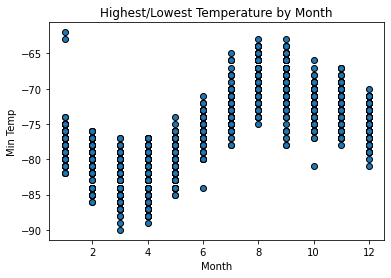

In [53]:
plt.scatter(Mars_df['month'],Mars_df['min_temp'], edgecolors='black')
plt.title(f'Highest/Lowest Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Min Temp')    


#Save Image
plt.savefig('Images/Highest-Lowest Temperature by Month.png')
plt.show()


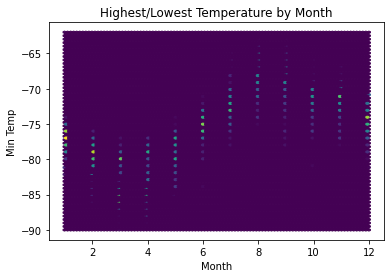

In [54]:
plt.hexbin(Mars_df['month'],Mars_df['min_temp'])
plt.title(f'Highest/Lowest Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Min Temp')    
#plt.grid()

#Save Image
plt.savefig('Images/Highest-Lowest Temperature by Month2.png')
plt.show()


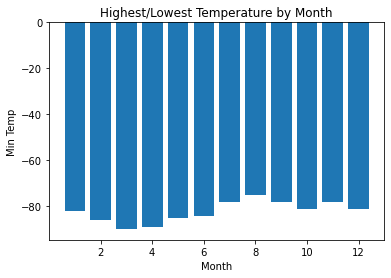

In [55]:
plt.bar(Mars_df['month'],Mars_df['min_temp'])
plt.title(f'Highest/Lowest Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Min Temp')    
#plt.grid()

#Save Image
plt.savefig('Images/Highest-Lowest Temperature by Month3.png')
plt.show()


In [56]:
Mars_df.groupby('pressure').mean()

,id,sol,ls,month,min_temp
pressure,,,,,
727,1895.000000,1977.000000,135.000000,5.0,-77.0
728,1893.000000,1976.000000,135.000000,5.0,-77.0
729,1893.000000,1974.500000,134.000000,5.0,-76.5
730,1890.000000,1972.500000,133.000000,5.0,-78.0
731,1889.000000,1970.500000,132.000000,5.0,-77.5
...,...,...,...,...,...
921,92.000000,181.285714,259.714286,9.0,-67.0
922,75.666667,166.666667,250.333333,9.0,-65.5
923,225.200000,308.400000,255.400000,9.0,-67.2


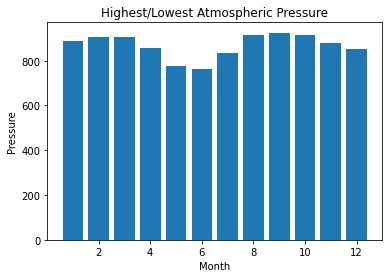

In [65]:
plt.bar(Mars_df['month'],Mars_df['pressure'])
plt.title(f'Highest/Lowest Atmospheric Pressure')
plt.xlabel('Month')
plt.ylabel('Pressure')    


#Save Image
plt.savefig('Images/Highest-Lowest Atmospheric Pressure.png')
plt.show()


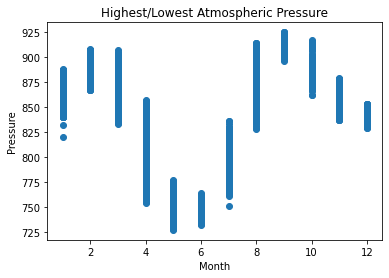

In [62]:
plt.scatter(Mars_df['month'],Mars_df['pressure'])
plt.title(f'Highest/Lowest Atmospheric Pressure')
plt.xlabel('Month')
plt.ylabel('Pressure')    
#plt.grid()

#Save Image
plt.savefig('Images/Highest-Lowest Atmospheric Pressure2.png')
plt.show()


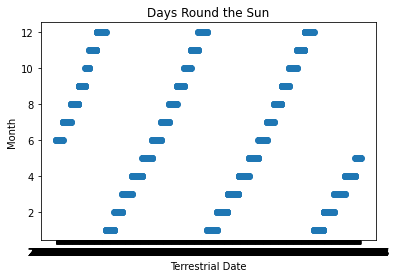

In [63]:
plt.scatter(Mars_df['terrestrial_date'],Mars_df['month'])
plt.title(f'Days Round the Sun')
plt.xlabel('Terrestrial Date')
plt.ylabel('Month')    


#Save Image
plt.savefig('Images/Days Round the Sun.png')
plt.show()


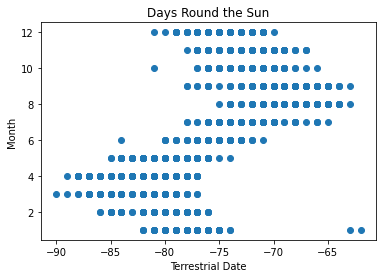

In [64]:
plt.scatter(Mars_df['min_temp'],Mars_df['month'])
plt.title(f'Days Round the Sun')
plt.xlabel('Terrestrial Date')
plt.ylabel('Month')    


#Save Image
plt.savefig('Images/Days Round the Sun2.png')
plt.show()


## What Can We Conclude from the Data.

Answer the following question: How many months exist on Mars? 
  12 Months

Answer the following question: How many Martian (and not Earth) days worth of data exist in the scraped dataset? 
  1,977 Sol Days

Answer the following question: What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
  The coldest month per our data set is the 3rd month while the warmest month is the 1st. 

Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars? 
  The month that has recorded the lowest atmospheric pressure is the 5th month at 727, but the month with the highest pressure is the 9th month at 925. 

Answer the following question: About how many terrestrial (Earth) days exist in a Martian year? 
  That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
  First full year I believe around 621 days and the second full year would be around 654.  Some of the dates on the were on the terrestrial days were not all accounted for. 
